# Unstructured Data Assignment 2
## Group Members:

Teagan Milford, Madeleine Cope, Laurenz Pehl, Sameer Ahmed, Trevor Allison, Sanyam Jain
Morning

# Install

In [3]:
!pip install nltk vaderSentiment spacy
!python -m spacy download en_core_web_md
import nltk
nltk.download('stopwords')

     -------------------------------------- 126.0/126.0 kB 1.9 MB/s eta 0:00:00
     --------------------------------------- 12.0/12.0 MB 10.1 MB/s eta 0:00:00
     ------------------------------------- 181.6/181.6 kB 10.7 MB/s eta 0:00:00
     ------------------------------------- 481.9/481.9 kB 29.5 MB/s eta 0:00:00
     -------------------------------------- 122.2/122.2 kB 7.0 MB/s eta 0:00:00
     ------------------------------------- 395.3/395.3 kB 24.1 MB/s eta 0:00:00
     ---------------------------------------- 1.5/1.5 MB 23.7 MB/s eta 0:00:00
     ---------------------------------------- 48.9/48.9 kB 2.4 MB/s eta 0:00:00
     ---------------------------------------- 45.9/45.9 kB 2.2 MB/s eta 0:00:00
     ---------------------------------------- 2.0/2.0 MB 42.1 MB/s eta 0:00:00
     ---------------------------------------- 6.6/6.6 MB 30.2 MB/s eta 0:00:00
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.4.0
    Uninstalling typing_

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [6]:
!pip install --upgrade typing_extensions

In [9]:
import pandas as pd
from collections import Counter
import nltk
from nltk.corpus import stopwords

In [11]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [15]:
# import spacy

In [14]:
import numpy as np
import pandas as pd

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

In [17]:
pd.set_option('display.max_columns', None)  # Display all columns
pd.set_option('display.width', None)        # Ensure full width is utilized in console
pd.set_option('display.max_colwidth', None)

In [18]:
import requests
from bs4 import BeautifulSoup
import re
import pandas as pd

# Scraper

In [ ]:
import requests
from bs4 import BeautifulSoup
import re
import pandas as pd

url = 'https://www.beeradvocate.com/beer/popular/'
page = requests.get(url)
soup = BeautifulSoup(page.content, 'html.parser')

# find anchor tags
tag = soup.find_all('a', href=lambda href: href and re.match(r'/beer/profile/\w+/\w+', href))
data = []

# go through links
for single_tag in tag:
    link = single_tag.get('href')
    product_list_url = 'https://www.beeradvocate.com' + link

    new_page = requests.get(product_list_url)
    new_soup = BeautifulSoup(new_page.content, 'html.parser')

    title = single_tag.get_text(strip=True)

    divs = new_soup.find_all('span', class_='muted')
    rating_div_BAscore = new_soup.find_all('span', class_='BAscore_norm')

    # reg x patterns
    pattern_decimal = r'<b>(\d+\.\d+)</b>'
    pattern_integer = r'<b>(\d+)</b>'
    pattern_decimal_BAscore_norm = r'<span class="BAscore_norm">(\d+\.\d+)</span>'
    pattern_integer_BAscore_norm = r'<span class="BAscore_norm">(\d+)</span>'

    ratings_list = []

    for rating_div in divs:
        ratings_decimal = re.findall(pattern_decimal, str(rating_div))
        ratings_integer = re.findall(pattern_integer, str(rating_div))
        ratings_list.extend(ratings_decimal)
        ratings_list.extend(ratings_integer)

    for rating_div in rating_div_BAscore:
        ratings_decimal = re.findall(pattern_decimal_BAscore_norm, str(rating_div))
        ratings_integer = re.findall(pattern_integer_BAscore_norm, str(rating_div))
        ratings_list.extend(ratings_decimal)
        ratings_list.extend(ratings_integer)

    div_with_text = new_soup.find_all('div', style='margin:20px 0px; font-size:11pt; line-height:1.4;')
    text = [div.get_text(strip=True) for div in div_with_text]

    num_reviews = len(text)
    ratings_list = ratings_list[:num_reviews]

    info = [{'Title': title, 'Review': review, 'Rating': rating} for review, rating in zip(text, ratings_list)]

    data.extend(info)

df = pd.DataFrame(data)

df.to_csv('scraped_beer_data_popular.csv', index=False)

print(df)

                Title  \
0     Breakfast Stout   
1     Breakfast Stout   
2     Breakfast Stout   
3     Breakfast Stout   
4     Breakfast Stout   
...               ...   
1978      Troegenator   
1979      Troegenator   
1980      Troegenator   
1981      Troegenator   
1982      Troegenator   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           

#Attribute

In [ ]:
# Only use this code block if you are using Google Colab.
# If you are using Jupyter Notebook, please ignore this code block. You can directly upload the file to your Jupyter Notebook file systems.
from google.colab import files

## It will prompt you to select a local file. Click on “Choose Files” then select and upload the file.
## Wait for the file to be 100% uploaded. You should see the name of the file once Colab has uploaded it.
uploaded = files.upload()

Saving scraped_beer_data.csv to scraped_beer_data.csv
Saving scraped_beer_data2.csv to scraped_beer_data2.csv


In [19]:
df1 = pd.read_csv('scraped_beer_data.csv')

In [20]:
df2 = pd.read_csv('scraped_beer_data2.csv')

In [32]:
common= []
not_common = []
for i in set(df1['Title'].to_list()):
    if i in set(df2['Title'].to_list()):
        common.append(i)
        print(i)
    else:
        not_common.append(i)

KBS
Breakfast Stout
Zombie Dust
Bomb!
§ucaba
Bourbon County Brand Coffee Stout
Consecration
Abt 12
Darkness
Parabola
Hunahpu's Imperial Stout
Heady Topper
Trappist Westvleteren 12 (XII)
The Abyss
Focal Banger
Trappistes Rochefort 10
Bourbon County Brand Stout
Abrasive Ale
Sip Of Sunshine
CBS (Canadian Breakfast Stout)
Pseudo Sue
Supplication
Pliny The Younger
Black Note Stout
Julius
Pliny The Elder
Black Tuesday


In [34]:
len(common)

27

In [35]:
len(not_common)

218

In [38]:
df_result = pd.merge(df1,df2 , how = "outer" , on = ["Title"])

In [41]:
df_result

Title  \
0                          Breakfast Stout   
1                            90 Minute IPA   
2                          Two Hearted IPA   
3                          Pliny The Elder   
4                             Heady Topper   
..                                     ...   
468           Cellarman Barrel Aged Saison   
469  All That Is And All That Ever Will Be   
470                                Abraxas   
471                         Stickee Monkee   
472                   Samuel Adams Utopias   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            

In [74]:
def add_lists(list1, list2):
    if list1 == list2:
        return list1
    elif pd.isna(list1) == True:
        return list2
    else:
        return list1

In [77]:
# df_result['text_xy'] = df.apply(df_result['text_x'] + df_result['text_y']
df_result['text_xy'] = df_result.apply(lambda row: add_lists(row['text_x'], row['text_y']), axis=1)
df_result['ratings_xy'] = df_result.apply(lambda row: add_lists(row['ratings_x'], row['ratings_y']), axis=1)

In [79]:
pd.isna(df_result[df_result['Title'] == 'Cellarman Barrel Aged Saison']['text_x'])

468    True
Name: text_x, dtype: bool

In [80]:
df_result['text'] = df_result['text_xy']

In [115]:
from nltk.tokenize import word_tokenize
import  string

def clean_sentence(sentence):
    sentence = sentence.lower()
    sentence = sentence.replace("'","")
    sentence = sentence.replace("/"," ")
    words = word_tokenize(sentence)
    translator = str.maketrans('', '', string.punctuation)
    cleaned_words = [word.translate(translator) for word in words]
    cleaned_words = [word for word in cleaned_words if word != '']
    cleaned_sentence = ' '.join(cleaned_words)
    return cleaned_sentence

df_result['text2'] = df_result['text'].apply(clean_sentence)

In [116]:
df_result[['text','text2']]

text  \
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       

In [117]:
len(df_result['text2'])

473

In [118]:
import pandas as pd
from collections import Counter

stop_words = set(stopwords.words('english'))

# Combine DataFrame reviews into one text
all_reviews = " ".join(df_result['text2'].tolist()).lower()

# Tokenize the reviews
words = all_reviews.split()

# Filter out stopwords and count the frequencies
filtered_words = [word for word in words if word not in stop_words]
word_freq = Counter(filtered_words)


In [119]:
# " ".join(df_result['text'].tolist())
# df_result['text2'].tolist()

In [120]:
len(all_reviews)

1317160

In [121]:
words

['amazing',
 'taste',
 'for',
 'a',
 'dark',
 'stout',
 'beer',
 'well',
 'well',
 'well',
 'well',
 'well',
 'stout',
 'lovers',
 'of',
 'the',
 'world',
 'unite',
 'and',
 'take',
 'over',
 'had',
 'on',
 'tap',
 'at',
 'bulldog',
 'saloon',
 'lynnwood',
 'wa',
 'im',
 'rating',
 'this',
 'based',
 'off',
 'of',
 'the',
 'kentucky',
 'breakfast',
 'stout',
 'drop',
 'beeradvocate',
 'says',
 'its',
 'retired',
 'but',
 'i',
 'just',
 'grabbed',
 'a',
 'pack',
 'of',
 'them',
 'last',
 'week',
 'it',
 'is',
 'sarcastically',
 'chocolate',
 'perfect',
 'amount',
 'of',
 'coffee',
 'in',
 'my',
 'personal',
 'opinion',
 'but',
 'the',
 'chocolate',
 'is',
 'objectively',
 'overwhelming',
 'i',
 'love',
 'this',
 'whenever',
 'im',
 'really',
 'in',
 'the',
 'mood',
 'for',
 'something',
 'rich',
 'but',
 'any',
 'other',
 'time',
 'its',
 'a',
 'bit',
 'much',
 'great',
 'specialty',
 'beer',
 'almost',
 'pure',
 'black',
 'with',
 'a',
 'small',
 'tan',
 'head',
 'the',
 'bubbles',
 'd

In [122]:
word_freq.most_common()[0:50]

[('beer', 1964),
 ('head', 1511),
 ('dark', 1176),
 ('taste', 1090),
 ('’', 1075),
 ('good', 956),
 ('chocolate', 923),
 ('light', 918),
 ('like', 906),
 ('sweet', 886),
 ('malt', 867),
 ('one', 818),
 ('nice', 809),
 ('notes', 754),
 ('coffee', 752),
 ('body', 705),
 ('medium', 701),
 ('bottle', 646),
 ('white', 635),
 ('flavor', 632),
 ('carbonation', 624),
 ('well', 602),
 ('bit', 598),
 ('brown', 590),
 ('pours', 588),
 ('aroma', 582),
 ('nose', 569),
 ('finish', 565),
 ('orange', 558),
 ('little', 551),
 ('great', 543),
 ('bitter', 535),
 ('black', 531),
 ('citrus', 527),
 ('smooth', 521),
 ('hops', 509),
 ('bitterness', 504),
 ('color', 485),
 ('ipa', 466),
 ('caramel', 456),
 ('really', 454),
 ('poured', 450),
 ('vanilla', 446),
 ('much', 440),
 ('glass', 429),
 ('fruit', 426),
 ('hop', 412),
 ('stout', 409),
 ('mouthfeel', 403),
 ('bourbon', 398)]

# Cosine Similarity

In [ ]:
# Only use this code block if you are using Google Colab.
# If you are using Jupyter Notebook, please ignore this code block. You can directly upload the file to your Jupyter Notebook file systems.
from google.colab import files

## It will prompt you to select a local file. Click on “Choose Files” then select and upload the file.
## Wait for the file to be 100% uploaded. You should see the name of the file once Colab has uploaded it.
uploaded = files.upload()

In [124]:
cosine_df = pd.read_csv('scraped_beer_data_toprated.csv')
cosine_df2 = pd.read_csv('scraped_beer_data_popular.csv')
cosine_merged = pd.concat([cosine_df, cosine_df2])
cosine_merged.head(5)

,Title,Review,Rating
0,Kentucky Brunch Brand Stout,"Amazing stout, expensive but worth the price!",4.75
1,Kentucky Brunch Brand Stout,This beer meet and exceeded all the unreal hype. It is simply amazing!,4.52
2,Kentucky Brunch Brand Stout,Let it sit and warm to the room a little ... unbelievable.,5.00
3,Kentucky Brunch Brand Stout,"A small pour, ebony dark, no real head. Intense, rich aroma, brownies and German chocolate cake; dark sweetness. The taste amplifies the smell with the addition of sublime Kentucky bourbon. Heavy body; dense, chewy residual sugar feel with a sublime whiskey heat.This beauty was generously provided by @azuelke (Adam) at a bottle share hosted by @GreenBayBA in Sheboygan, WI. There were many great beers sample, many beautiful and exquisite dark beers, but nothing quite like this legendary beer. If ever you have a chance to try this one, all I can say is don't pass it up. The beer lives up to its legendary status.Pouring temperature: n/a; bottling info: unknown year, bottle number #138Source: @azuelke (Adam), Sheboygan, WI bottle share",5.00
4,Kentucky Brunch Brand Stout,"Vintage 2022, served on tap at Toppling Goliath in a ""snulip"" glass. Opaque deep blackish brown in color, with garnet highlights and a wisp of tan head. Where to start? Notes of cocoa, molasses, licorice, cherry cola, and maple syrup. The bourbon/barrel was, surprisingly, quite understated. Full body, almost syrupy, with good carbonation and a chewy mouthfeel. This finishes cleanly, with hints of roasted malt, maple syrup, and molasses lingering on the finish. This was incredibly easy drinking and not at all boozy despite the high ABV, and it was so good that I wanted to lick the glass clean. World class all the way.",4.96


In [125]:
cosine_merged[cosine_merged['Title'] == 'Breakfast Stout']

,Title,Review,Rating
758,Breakfast Stout,Amazing taste for a dark stout beer!,4.28
759,Breakfast Stout,"Well, well, well, well, well. Stout lovers of the world, unite and take over.",4.40
760,Breakfast Stout,"Had on tap at Bulldog Saloon Lynnwood, WA.",4.25
761,Breakfast Stout,"I'm rating this based off of the Kentucky Breakfast Stout drop, BeerAdvocate says it's retired but I just grabbed a pack of them last week. It is SARCASTICALLY chocolate, perfect amount of coffee in my personal opinion, but the chocolate is objectively overwhelming. I love this whenever I'm really in the mood for something rich, but any other time it's a bit much. Great specialty beer.",4.78
762,Breakfast Stout,"Almost pure black with a small tan head. The bubbles dissipate pretty fast, leaving just a few smaller ones and some lacing.Very strong coffee smell. There is a hint of chocolate, helping to balance things a bitNot surprisingly, there is a strong coffee note up front, then the chocolate sweetness kicks in. There is a lingering bitterness at the finish.It is a bit thinner than expected, mostly carbonation on the tongue.I can see how this is the base for the KBS beers, it is pretty solid. With so much coffee flavor, I'd consider this a dessert beer. It's good, but I definitely prefer the KBS variants.",4.37
763,Breakfast Stout,"Pours a great thick black with a nice head that does hang around throughout the drink, smells of coffee with a slight sweetness... black coffee with one sugar. has a medium mouth feel, tastes of bitter coffee, maybe over roasted coffee but does give off a good feeling of a nice early morning cup of joe",5.00
764,Breakfast Stout,"12 ounce bottle, poured after warming for 30 minutes, into a Founders snifter.Dark mud coffee black, fine dense brown head that recedes slowly.Aroma of Italian roast ground coffee beans and cafe Cubano. A chocolate note too.Wickedly tasty, leads right off with the coffee. Then char and dark chocolate run around like a marble in the mouth. Finishes mildly sweet, then slightly bitter and dry.Oats delivers a fine creamy smoothness. Medium carbonation.Overall, a beautiful expression of brewing creativity and truly an ‘anytime’ treat.",4.53
765,Breakfast Stout,"I love coffee. I love stouts. I love oatmeal stouts. I usually love coffee stouts. Given all that, I expected to love the #2 oatmeal stout in the world according to the current ranking. Unfortunately, I didn’t. The coffee smell is above average, but the taste is overly bitter and mostly just reminds me of bad coffee that was roasted far too long. This one is not for me.",4.40
766,Breakfast Stout,"Poured from a 12-oz bottle into a pint glass.Appearance: Very dark brown, nearly black, with a dark tan head so thick that it required multiple gradual pourings to prevent overflowing the glass. Moderate lacing.Nose: Dark roast, stone fruit, brown sugar, coffee — there’s a lot going on here.Mouthfeel: Creamy, moderately thick.Attack: Dark roast, coffee, chocolate, smooth — plenty going on here, too.Finish: Alcohol, and bitterness from the dark roast that balances everything wonderfully.Overall: It’s hard to imagine how an American Oatmeal Stout could be any better than this — so full, smooth, and well-balanced. There’s nothing I’d rather drink with Biscuits and Gravy, but it’s also going very well this morning with goetta and scrambled eggs. This beer deserves every bit of its high ratings.",4.29
0,Breakfast Stout,Amazing taste for a dark stout beer!,4.28


In [129]:
cosine_merged = cosine_merged.reindex()
cosine_merged.drop_duplicates(inplace = True)

In [131]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel


tfidf_vectorizer = TfidfVectorizer(vocabulary=['sweet', 'orange', 'coffee'])
tfidf_matrix = tfidf_vectorizer.fit_transform(cosine_merged['Review'])

# Compute similarity scores
cosine_similarities = linear_kernel(tfidf_matrix, tfidf_matrix)

# Adding similarity scores to the dataframe for each review
# We're taking the sum of similarity scores with other reviews as an example metric.
cosine_merged['Average_Similarity'] = cosine_similarities.mean(axis=1)

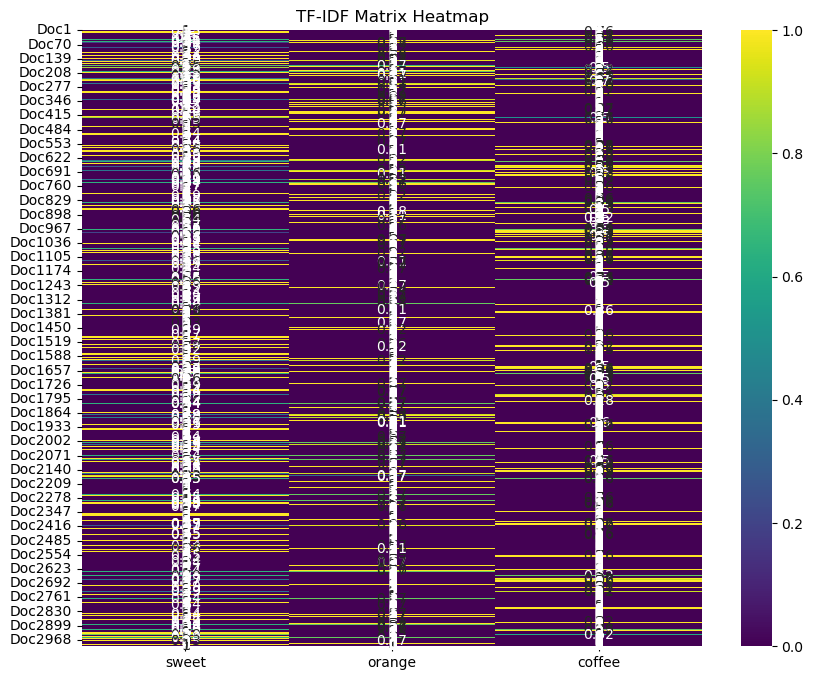

In [139]:
import seaborn as sns
import matplotlib.pyplot as plt

# Convert the TF-IDF matrix to a dense format and create a DataFrame with appropriate row/column labels
tfidf_df = pd.DataFrame(tfidf_matrix.todense(), columns=tfidf_vectorizer.get_feature_names_out(), index=[f'Doc{i+1}' for i in range(len(cosine_merged['Review']))])

# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(tfidf_df, annot=True, cmap='viridis')
plt.title('TF-IDF Matrix Heatmap')
plt.show()

In [142]:
cosine_merged[cosine_merged['Average_Similarity'] > 0]

,Title,Review,Rating,Average_Similarity
5,Vanilla Bean Assassin,"12oz bottle…2022 version. Drank 12/25/22.Pours dark brown/black, not much carbonation. Smells of sweet chocolate, vanilla, and barrel. Taste is marshmallows soaked in bourbon. Perfect sweetness. If there is a knock it’s slightly on the thin side, but that’s being picky. Probably the best adjunct stout I’ve had. Truly lives up to the hype.",5.00,0.177964
7,Marshmallow Handjee,"2022 vintage, bottle 1316/3500Another milestone review, number 1800! I figured since I have the highest rated RIS on BA just sitting around that it would be a perfect time to break it out. This is my first of any Dark Lord variant, and I think it’s a damn good place to start for the series. Let’s pop this legend open and see what it has to offerPours almost completely pitch black with a finger of creamy tan head that fades to a thin cap and leaves minimal lacingThe roast is real in this one, but it’s wonderfully offset by the sweeter notes as well. I’m picking up on aromas of drip coffee, burnt caramel, dark toast, milk chocolate, tobacco, vanilla bean, molasses, toasted oak, fig, and light cinnamonIt’s similar in taste, but with even more of a depth, making this one hell of a complex beer. On the front end of the sip I’m tasting milk chocolate, vanilla bean, sweetened coffee, toasted oak, fig, maple syrup, burnt caramel, sweet bourbon, cinnamon, black cherry, and marshmallow. The swallow brings notes of milk chocolate, charred oak, maple syrup, burnt caramel, black cherry, fig, vanilla bean, allspice, sweet bourbon, marshmallow, dark toast, and tobaccoA medium body pairs with gentle carbonation, resulting in a smooth beer. Finishes mostly dry with just a touch of boozy heatOh yeah, this is amazing. Thankfully a beer that lives up to the hype. Maybe one day I’ll splurge on another bottle",4.75,0.214981
10,Marshmallow Handjee,"Had the yellow wax at a wedding dinner party. Vanilla/marsh overload, barrel was there, but mostly sweet. Pretty good",4.53,0.177964
16,Abraxas - Barrel-Aged,Good. Not noticeably better than normal abraxas. Id say overly sweet per style and too mich cinnamon. #3 beer on beer advocate LMAO no.Okay. Fuck. The more I drink this the more I can barely finish the 9oz pour. Sugar cinnamon water. Cloying and WAY fucking 2 dimensional and cloying.,4.64,0.177964
23,Blessed,"2021 editiion, drank May 2022. So sweet, even the small bottle was a lot to drink solo. Ten Years was much more balanced.",4.93,0.177964
...,...,...,...,...
1954,Dortmunder Gold,"Pours a crystal-clear amber/gold with a thick white cap. Nice lacing. Aroma is roasted malt, biscuit, grassy hops. Flavor follows the nose, sweet up front with a bit of noble hop bitterness in the finish. Feel is medium bodied, with good carbonation. Overall, a fantastic beer.",3.91,0.177964
1955,Dortmunder Gold,5/1/23 Ford from a 12 oz can purchased from the Washington beer store.Very little lacing or much head.Aroma is sweet malt right up front. Slight citrus as well.Taste is definitely lager. Sweet. Cracker. Dry hoppiness comes through.,4.01,0.177964
1957,Dortmunder Gold,"Pours a crystal-clear gold with a foamy white head and good lacing. Very bright herbal and hay like aroma, toasty cracker, and sweet bread dough. The taste is spicy, herbal and fresh, with a toasty/bready malt backbone, moderate body and clean, drying finish. Very flavorful and quaffable. I don't really know exactly what a Dortmunder-Style Lager is supposed to taste like, but this is world-class beer.",4.34,0.177964
1970,Troegenator,"Drank 2 for this rating, one warmed for a few minutes and one straight from the fridgePours somewhere between copper and amber, slightly hazy with a quickly dissipating 3.5 finger khaki headSmells upfront mildly of hops and definitely of malt, maybe a tiny bit of lemon?Tastes very sweet initially, followed by caramel, with an aftertaste of dried fruit, with very little bitterness throughout. I notice more bitterness the more I drink, 

# Sentiment Score

In [143]:
analyzer = SentimentIntensityAnalyzer()

def vader_sentiment(text):
    return analyzer.polarity_scores(text)['compound']

cosine_merged['Sentiment_Score'] = cosine_merged['Review'].apply(vader_sentiment)

In [144]:
cosine_merged.head(2)

,Title,Review,Rating,Average_Similarity,Sentiment_Score
0,Kentucky Brunch Brand Stout,"Amazing stout, expensive but worth the price!",4.75,0.0,0.6588
1,Kentucky Brunch Brand Stout,This beer meet and exceeded all the unreal hype. It is simply amazing!,4.52,0.0,0.6239


# Recomendation

In [ ]:
# Normalizing scores to [0,1]
cosine_merged['Normalized_Similarity'] = (cosine_merged['Average_Similarity'] - cosine_merged['Average_Similarity'].min()) / (cosine_merged['Average_Similarity'].max() - cosine_merged['Average_Similarity'].min())
cosine_merged['Normalized_Sentiment'] = (cosine_merged['Sentiment_Score'] + 1) / 2  # Assuming VADER sentiment (-1 to 1)

# Combining score
weight_similarity = 0.7
weight_sentiment = 0.3

cosine_merged['Combined_Score'] = weight_similarity * cosine_merged['Normalized_Similarity'] + weight_sentiment * cosine_merged['Normalized_Sentiment']

brand_scores = cosine_merged.groupby('Title').agg({
    'Normalized_Similarity': 'mean',
    'Normalized_Sentiment': 'mean',
    'Combined_Score': 'mean'
}).reset_index()

# Recommending the brand with the highest combined score
recommended_brand = brand_scores.sort_values(by='Combined_Score', ascending=False).iloc[0:3]['Title']
print(f"We recommend you to buy: {recommended_brand.values}")


# Task F

How would your recommendation change if you use word vectors (e.g., the spaCy package with
medium sized pretrained word vectors) instead of the plain vanilla bag-of-words cosine similarity? One
way to analyze the difference would be to consider the % of reviews that mention a preferred attribute.
E.g., if you recommend a product, what % of its reviews mention an attribute specified by the customer?
Do you see any difference across bag-of-words and word vector approaches? Explain. This article may be
useful: https://medium.com/swlh/word-embeddings-versus-bag-of-words-the-curious-case-of-
recommender-systems-6ac1604d4424?source=friends_link&sk=d746da9f094d1222a35519387afc6338
Note that the article doesn’t claim that bag-of-words will always be better than word embeddings for
recommender systems. It lays out conditions under which it is likely to be the case. That is, depending
on the attributes you use, you may or may not see the same effect.

In [ ]:
import spacy
import numpy as np


nlp = spacy.load('en_core_web_md')


cosine_merged['Vector'] = cosine_merged['Review'].apply(lambda x: nlp(x).vector)

# Define attributes and calculate their vectors
attributes = ['sweet', 'light', 'chocolate']
attribute_vectors = [nlp(attr).vector for attr in attributes]

# Calculate similarity scores for each review against attributes
def calculate_similarity(review_vector):
    return np.mean([np.dot(review_vector, attr_vec) / (np.linalg.norm(review_vector) * np.linalg.norm(attr_vec)) for attr_vec in attribute_vectors])

cosine_merged['Similarity_Score'] = cosine_merged['Vector'].apply(calculate_similarity)

In [ ]:
# Aggregate scores at the brand level
brand_scores = cosine_merged.groupby('Title').agg({
    'Similarity_Score': 'mean'
}).reset_index()

# Recommend the brand with the highest similarity score
recommended_brand = brand_scores.sort_values(by='Similarity_Score', ascending=False).iloc[0:3]['Title']
print(f"We recommend you to buy: {recommended_brand.values}")

Recommendation from BOW:
['It Was All A Dream' 'Scaled Way Up' 'Morning Wood']

Recommendation from Vectors: ['It Was All A Dream' 'Moment Of Clarity' 'Hold On To Sunshine']

In [ ]:

# Your preferred attributes
attributes = ['sweet', 'orange', 'coffee']

# Define a function to compute the percentage of reviews mentioning the attributes for a given brand
def attribute_percentage(brand, attributes):
    brand_reviews = cosine_merged[cosine_merged['Title'] == brand]['Review']
    count = sum([any(attr in review for attr in attributes) for review in brand_reviews])
    return count / len(brand_reviews) * 100

# Brands recommended by BoW and Vectors
bow_brands = ['It Was All A Dream', 'Scaled Way Up', "Morning Wood"]
vector_brands = ['It Was All A Dream', 'Moment Of Clarity', 'Hold On To Sunshine']

# Compute percentages for the recommended brands
bow_percentages = {brand: attribute_percentage(brand, attributes) for brand in bow_brands}
vector_percentages = {brand: attribute_percentage(brand, attributes) for brand in vector_brands}

print("BoW Recommendations with attribute percentages:")
for brand, percent in bow_percentages.items():
    print(f"{brand}: {percent:.2f}%")

print("\nVector Recommendations with attribute percentages:")
for brand, percent in vector_percentages.items():
    print(f"{brand}: {percent:.2f}%")


In [ ]:
a = len(cosine_merged[cosine_merged['Title'] == 'It Was All A Dream'])
b = len(cosine_merged[cosine_merged['Title'] == 'Morning Wood'])
c = len(cosine_merged[cosine_merged['Title'] == 'Scaled Way Up'])
print(a, b, c)

In [ ]:
d = len(cosine_merged[cosine_merged['Title'] == 'Moment Of Clarity'])
e = len(cosine_merged[cosine_merged['Title'] == 'Hold On To Sunshine'])
print(d, e)

#Task G
How would your recommendations differ if you ignored the similarity and feature sentiment
scores and simply chose the 3 highest rated products from your entire dataset? Would these products
meet the requirements of the user looking for recommendations? Why or why not? Justify your answer
with analysis. Use the similarity and sentiment scores as well as overall ratings to answer this question.



In [ ]:
average_ratings = cosine_merged.groupby('Title')['Rating'].mean().reset_index()

top_3_ratings = cosine_merged.groupby('Title')['Rating'].mean().sort_values(ascending=False).head(3).reset_index()

print("Top 3 highest rated are:")
for idx, row in top_3_ratings.iterrows():
    print(f"{idx + 1}. {row['Title']} with an average rating of {row['Rating']:.2f}")

In [ ]:
# Your preferred attributes
attributes = ['sweet', 'coffee', 'orange']

# Define a function to compute the percentage of reviews mentioning the attributes for a given brand
def attribute_percentage(brand, attributes):
    brand_reviews = cosine_merged[cosine_merged['Title'] == brand]['Review']
    count = sum([any(attr in review for attr in attributes) for review in brand_reviews])
    return count / len(brand_reviews) * 100

top_brands = ['Vanilla Bean Assassin', 'Yellow Bus', "Double Barrel Jesus"]

top_brands = {brand: attribute_percentage(brand, attributes) for brand in top_brands}

print("BoW Recommendations with attribute percentages:")
for brand, percent in top_brands.items():
    print(f"{brand}: {percent:.2f}%")



Task H: Using the top four attributes of beer (from word frequency analysis), calculate the lifts between
these attributes and any 10 beers in your data. Choose one beer, and find the most similar beer (among
the remaining 9) using the lift values. Explain your method.
These links may be helpful:
https://medium.datadriveninvestor.com/who-is-your-competitor-in-the-era-of-the-long-tail-
d0ac24fedde8
An actual recommender using this approach: https://runningshoesforyou.com
